# Term Deposit Propensity Prediction 

In this project, I worked on a dataset provided from an imaginary company called ACME, which is assumed as a small startup focusing mainly on providing machine learning solutions in the European banking market.

Main goal is to set up an end to end ML project to predict customers Term Deposit buying propensity by using call center data. In other words, its been tried to put a probability about whether customers willing to subscribe term deposit. Addition to this, last part was reserved to clustering of customers to find out the customers who are more likely to buy investment products. 

The dataset is provided by an employer directly with the following [link](https://drive.google.com/file/d/1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7), which includes 40 thousand of customer data with 14 features including term deposit ownership. 

The first part of this report is devoted to data exploration, and continues with the parts of data transformation and model establishment, respectively. At the last part, final model is decided and a function was defined to use pre trained ML model to predict by using raw data whether a customer is willing to subscribe Term Deposit or not. 

Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

# 1. Data Exploration

In [2]:
import os
os.chdir("E:/git projects/term_deposit_propensity")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [172]:
df = pd.read_csv("term-deposit-marketing-2020.csv")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [6]:
df.shape

(40000, 14)

From the code output below, target data seems unbalanced as the pie chart shows. In that case, it can be easily said that, if a model is implemented without doing any transformation and/or balancing, the model most likely to assign all predictions to "no" and can still achieve approximately %93 accuracy if used for prediction on all data.

It is seen from the code outputs that, there is no missing value in any feature. However, as it is realized from the following outputs, there are hidden missing values which were filled with "unknown" value in 3 features. 

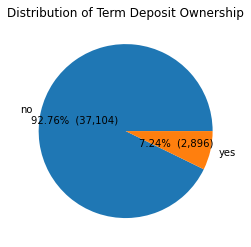

In [7]:
plt.pie(df.y.value_counts(), labels = ['no', 'yes'] ,autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(df.y.value_counts())/100))
plt.title("Distribution of Term Deposit Ownership")
plt.show()

In [8]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
y            False
dtype: bool

Distribution of age


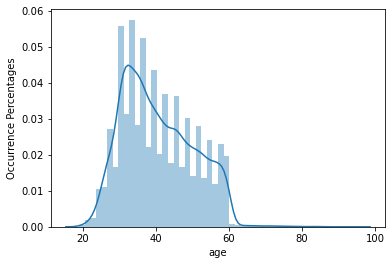

Distribution of balance


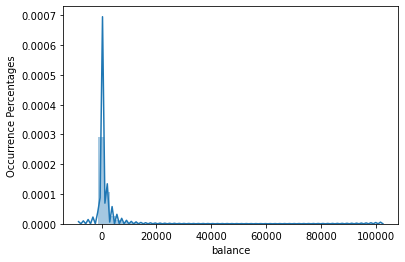

Distribution of day


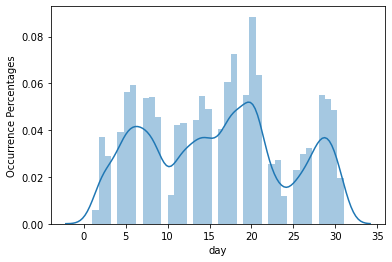

Distribution of duration


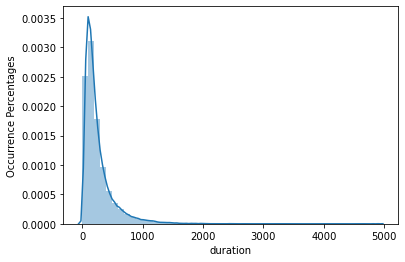

Distribution of campaign


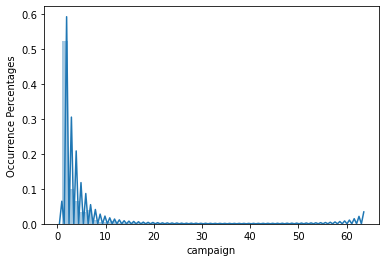

In [9]:

for col in df.columns:
    if(df[col].dtypes=='int64'):
        sns.distplot(df[col])
        plt.title(print("Distribution of", col))
        plt.xlabel(col)
        plt.ylabel("Occurrence Percentages")
        plt.show()

As it is observed from the outputs above, most of integer typed features distributed differently but not normally. And the graphs below show the relation btw target variable and others. 

One important thing to mention is, when generating box plots, if used variable has extreme outliers, logaritm of that variable taken into account. And to determine extreme outliers, the variables checked if any value reaches the limit that is calculated by taking 3 times of Interquantile range and skewness ratio is above 3 at the same time. The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. On the other hand the skewness value explains if the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.



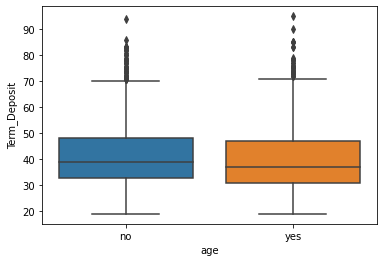

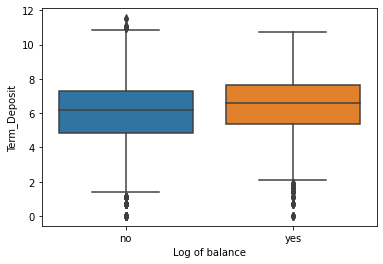

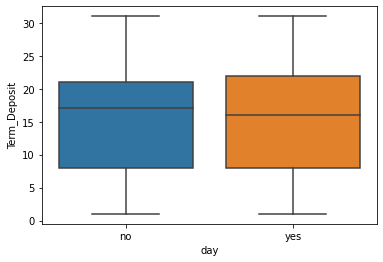

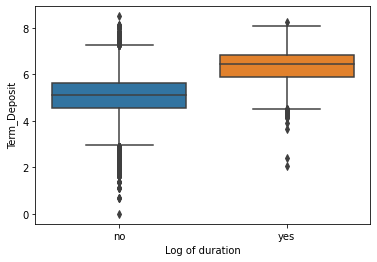

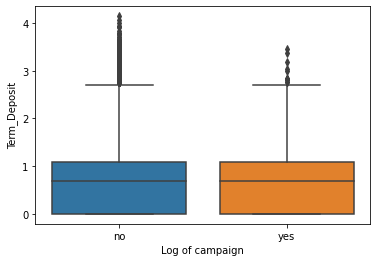

In [10]:
warnings.simplefilter("ignore") 

for col in df.columns:
    if(df[col].dtypes=='int64'):
        if((((df[col] < (df[col].quantile(0.25) - 3 * (df[col].quantile(0.75) - df[col].quantile(0.25)))) 
             |(df[col] > (df[col].quantile(0.75) + 3 * (df[col].quantile(0.75) - df[col].quantile(0.25))))).any())
            and (df[col].abs().skew()>3)):
            sns.boxplot(df.y, np.log(df[col]), data=df)
            plt.xlabel("Log of "+col)
            plt.ylabel("Term_Deposit")
            plt.show()  
        else:
            sns.boxplot(df.y, col, data=df)
            plt.xlabel(col)
            plt.ylabel("Term_Deposit")
            plt.show()            
        

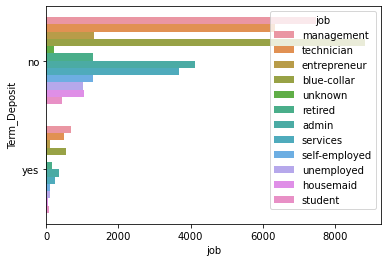

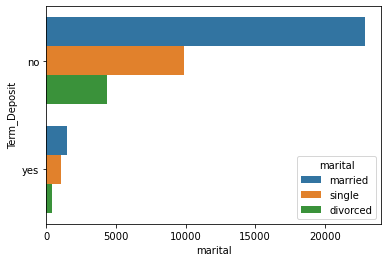

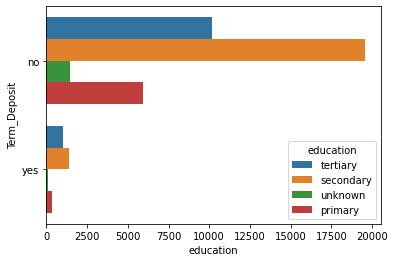

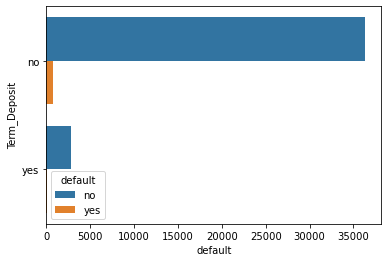

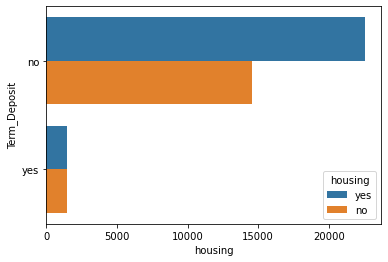

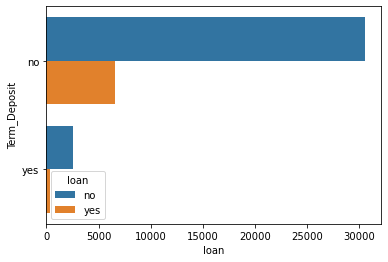

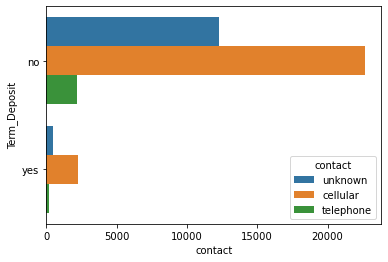

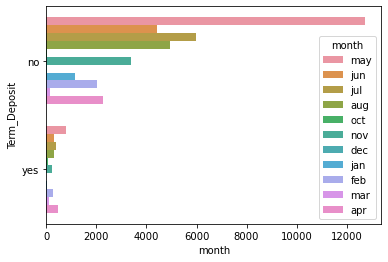

In [11]:
for col in df.drop(["y"],axis=1).columns:
    if(df[col].dtypes!='int64'):
        sns.countplot(y="y", hue=col, data=df)
        plt.xlabel(col)
        plt.ylabel("Term_Deposit")
        plt.show()

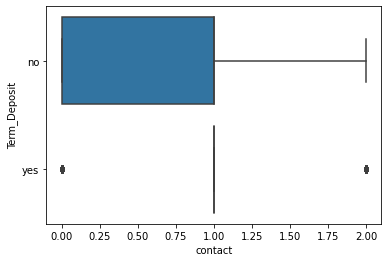

In [12]:
sns.boxplot(df.contact.map({"telephone":2, "cellular":1, "unknown":0}), df.y,data=df)
plt.xlabel(df.contact.name)
plt.ylabel("Term_Deposit")
plt.show() 

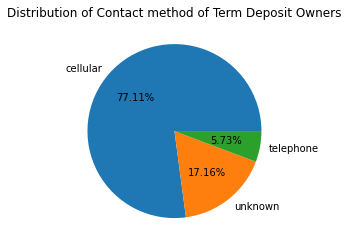

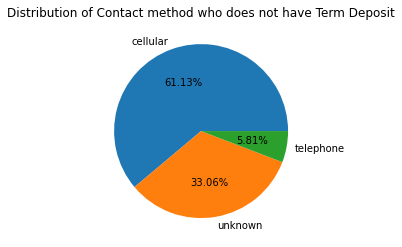

In [173]:
plt.pie(df[df.y == "yes"].contact.value_counts(), labels = ['cellular', "unknown", "telephone"] ,autopct='%1.2f%%')
plt.title("Distribution of Contact method of Term Deposit Owners")
plt.show()
plt.pie(df[df.y == "no"].contact.value_counts(), labels = ['cellular', "unknown", "telephone"] ,autopct='%1.2f%%')
plt.title("Distribution of Contact method who does not have Term Deposit")
plt.show()

In [14]:
df[df.y.map({"yes":1, "no":0})==1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
83,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,yes
86,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,yes
168,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,29,management,single,tertiary,no,637,yes,no,cellular,3,jun,340,1,yes
39988,55,management,divorced,tertiary,no,2383,no,no,cellular,3,jun,591,2,yes
39990,26,technician,single,secondary,no,1231,yes,no,cellular,3,jun,385,2,yes
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes


In [15]:
df[df.month=="may"].day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  4, 11, 18, 22, 25], dtype=int64)

In [16]:
df.default.map({"yes":1, "no":0}).sum()

809

In [17]:
df[(df.y=="yes")&(df.default=="yes")].iloc[:,0].count()

49

In [18]:
df.campaign.value_counts()

1     14718
2     11153
3      4970
4      3297
5      1642
6      1228
7       699
8       526
9       318
10      262
11      197
12      154
13      131
14       93
15       83
16       78
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [19]:
for col in df.columns:
    if (df[df[col]=="unknown"].iloc[:,0].any()):
        print(col, " column has ", "\033[1m", df[df[col]=="unknown"].iloc[:,0].count() ,"\033[0m", " number of unknown values")

job  column has   235   number of unknown values
education  column has   1531   number of unknown values
contact  column has   12765   number of unknown values


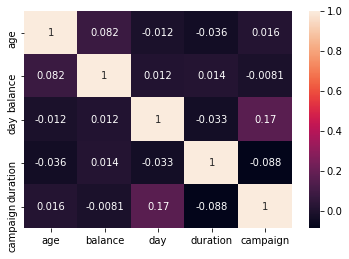

In [20]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# 2. Data Transformation

In [21]:
# To check how many exptreme outliers per variable

print(((df < (df.quantile(0.25) - 3 * (df.quantile(0.75) - df.quantile(0.25)))) |(df > (df.quantile(0.75) + 3 * (df.quantile(0.75) - df.quantile(0.25))))).sum())

age             2
balance      2261
campaign     1449
contact         0
day             0
default         0
duration     1092
education       0
housing         0
job             0
loan            0
marital         0
month           0
y               0
dtype: int64


In this section, I tried several df options by using various transformations. Since the dataset includes categorical features, I converted them to dummy in any case. However I did not use transformations in my first approach, but I used it on others. So  transformation steps started after convertion of duration feature from seconds to minutes and implementation of one hot encoding on to "job", "marital", "education", "contact" columns and addition to them yes-no values in "default","housing","loan","y" columns converted into 1-0 values. After these steps the first dataset was generated by only converting day and month columns into dummy as well. **df1**

In the second one, "age column converted into 10 chunks as categories with identical widths and age chunks converted to dummy variables. Moreover, "day" and "month" features concatenated and converted into datetime datatype and then day difference from last day of the year(31.12) will be calculated and pushed into new feature called day_diff. 
And after spliting test and train data, I scaled "balance" , "duration", "campaign" features by using MinMaxScaler to scale them between 0-1 and keep the affect of outliers simultaneously.**df2**

In the last transformation, addition to the "age" and "day", "month" transformations, which were handled in previous step;  "campaign" variable was transformed by changing all values above 3 (>3) to 4 to decrease number of unique values and then it converted into categorical variable by transformed it into dummy accordingly. 
Additionally, this time I transformed "balance" and "duration" features to decrease the affect of outliers, after spliting test and train datasets.**df3**

## 2.1 Data Preprocessing - One Hot Encoding

In [22]:
df.duration = round(df.duration/60,2)

In [23]:
for col in ["default","housing","loan","y"]:
    df[col] = df[col].map({"yes":1, "no":0})


In [24]:
for col in ["job","marital","education","contact"]:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col)], axis=1)
    

In [25]:
pd.set_option("display.max_columns", 1000)
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,may,4.35,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,2.52,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,5,may,1.27,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,may,1.53,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,5,may,3.30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1


## 2.2 First Dataset - (df1)

In [26]:
df1 = df.copy()

In [27]:
for col in ["day","month"]:
    df1 = pd.concat([df1.drop(col, axis=1), pd.get_dummies(df1[col], prefix=col)], axis=1)
    

In [28]:
df1.shape #it ends up with 72 features

(40000, 72)

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  40000 non-null  int64  
 1   default              40000 non-null  int64  
 2   balance              40000 non-null  int64  
 3   housing              40000 non-null  int64  
 4   loan                 40000 non-null  int64  
 5   duration             40000 non-null  float64
 6   campaign             40000 non-null  int64  
 7   y                    40000 non-null  int64  
 8   job_admin            40000 non-null  uint8  
 9   job_blue-collar      40000 non-null  uint8  
 10  job_entrepreneur     40000 non-null  uint8  
 11  job_housemaid        40000 non-null  uint8  
 12  job_management       40000 non-null  uint8  
 13  job_retired          40000 non-null  uint8  
 14  job_self-employed    40000 non-null  uint8  
 15  job_services         40000 non-null 

## 2.3 Second Dataset - (df2)

In [153]:
df2 = df.copy()

In [154]:
import datetime
df2. month = df2.month.apply(lambda x : datetime.datetime.strptime(x, "%b").month)

In [155]:
df2 = df2.assign(day_diff = 365-(df2.day + ((df2.month-1)*30)))

In [156]:
df2 = df2.assign(quarter = np.where(df2.month<4, 1, np.where(df2.month<7,2, np.where(df2.month<10,3,4))))

In [157]:
df2.drop(["day","month"], axis=1, inplace=True)

In [158]:
# Extreme outliers 
df2[((df2.age < (df2.age.quantile(0.25) - 3 * (df2.age.quantile(0.75) - df2.age.quantile(0.25)))) |(df2.age > (df2.age.quantile(0.75) + 3 * (df2.age.quantile(0.75) - df2.age.quantile(0.25)))))].age

31233    94
33699    95
Name: age, dtype: int64

Although it is required to fit a transformation into train data but not test data to prevent overfitting, since I planned to transform age variable into 10 chunks as categories with identical widths, there won't be any weighted bins and chunk limits will be same whether it is fitted on train data or the whole dataset. So, I fitted and transformed age data before spliting test and train datasets. 

In [159]:
from sklearn.preprocessing import KBinsDiscretizer

In [160]:
df2.age.nunique()

70

In [161]:
transformer = KBinsDiscretizer(n_bins=10,encode='onehot',strategy='uniform')
transformer.fit(np.array(df2.age).reshape(-1,1))

KBinsDiscretizer(encode='onehot', n_bins=10, strategy='uniform')

In [162]:
df2 = pd.concat([df2.drop("age",axis=1),
                 pd.DataFrame.sparse.from_spmatrix(transformer.transform(np.array(df2.age).reshape(-1,1))).add_prefix('age_chunk_')], axis=1)

In [164]:
df2.tail()

,default,balance,housing,loan,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,day_diff,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9
39995,0,395,0,0,1.78,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,212,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39996,0,3340,0,0,3.97,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,212,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,0,200,0,0,2.83,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,212,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39998,0,1047,0,0,5.70,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,212,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39999,0,1442,1,0,1.88,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,212,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
import pickle
pickle.dump(transformer, open('transformer.pkl', 'wb'))

## 2.4 Third Dataset - (df3)

In [40]:
df3 = df2.copy()

In [41]:
df3.loc[df3.campaign > 3, "campaign"] = 4

In [42]:
df3.campaign.unique()

array([1, 2, 3, 4], dtype=int64)

In [43]:
df3 = pd.concat([df3.drop("campaign", axis=1), pd.get_dummies(df3.campaign, prefix="campaign")], axis=1)

In [44]:
df3.head()

,default,balance,housing,loan,duration,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,day_diff,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9,campaign_1,campaign_2,campaign_3,campaign_4
0,0,2143,1,0,4.35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,240,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0
1,0,29,1,0,2.52,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,240,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
2,0,2,1,1,1.27,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,240,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,0,1506,1,0,1.53,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,240,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,0,1,0,0,3.30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,240,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0


# 3. Model Trials with 3 datasets

Since the dataset is imbalanced in terms of target value, it should be balanced before model training process. There are 2 main ways to balance, one of them is, taking same number of random negatives(y=0) with positives(y=1), in other words, since y=1 is observed in 2896 observations, same amount of y=0 observations will be taken and the dataset used this 5792 observations at total to train a model. Another approach is to generate new observations from available positives(y=1) until the amount of it will reach to negatives(y=0). Since there are around 37.000 negatives available at total, same amount of positives will be generated. 

In this section models will be trained by using second approach with 74208 observations by using bootstrap method to generate new positive observations. Because, in case of using first approach, the total number of positives are limited compare to negatives and to equalize the number of negatives according to this may probably cause information loss on negative(y=0) observations. To prevent this information loss, sample from negatives(y=0) may selected iteratively, but still some of observations will remain out of bag. On the other hand, although using second approach may restrict model to predict positives generated from 2900 observations, model will still provide predictions as probabilities and probably predictions can still reach 0.5 threshold for similar observations. 

## 3.1 Model Trials with df1

In [45]:
df_bal = pd.concat([pd.DataFrame(df1[df1.y==1].sample(n=df1[df1.y!=1].iloc[:,1].count(), replace=True, random_state=123)), 
                df1[df1.y!=1]])

df_bal.y.value_counts()

1    37104
0    37104
Name: y, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_bal.loc[:,df_bal.columns != "y"],df_bal.y, train_size=0.80, random_state= 123)

for d in X_train, X_test, y_train, y_test:
    name =[x for x in globals() if globals()[x] is d][0]
    print(name, d.shape)

X_train (59366, 71)
X_test (14842, 71)
y_train (59366,)
y_test (14842,)


In [47]:
X_train.head(2)

,age,default,balance,housing,loan,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
39950,56,0,0,0,0,1.18,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
39939,49,0,5887,0,0,3.02,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [48]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold,RandomizedSearchCV, GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

First of all, I would like to see the accuracy and F-1 score results of various algorithms with their default specifications and without using cross validation. After this process I will evaluate models and will try to improve their results by model tuning. 

In [49]:
def model_results(model):
        model.fit(X_train, y_train)
        pred=model.predict(X_test)
        print("\033[1m","Model Name :",(str(model).split("(")[0]), "\033[0m" )
        print("Accuracy on training set :" , model.score(X_train, y_train))
        print("Accuracy on test set:", model.score(X_test, y_test))
        ax = plt.axes()
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, annot_kws={"size": 10}, cbar=False, fmt="d")
        ax.set_title(print("\033[1m"+ " Confusion Matrix ;"+"\033[0m"))
        plt.show()
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))
        preds = pd.DataFrame(pred,index = X_test.index, columns= ['predictions'])
        print(" ")


 Model Name : GradientBoostingClassifier 
Accuracy on training set : 0.8899201563184315
Accuracy on test set: 0.8866729551273413
 Confusion Matrix ;


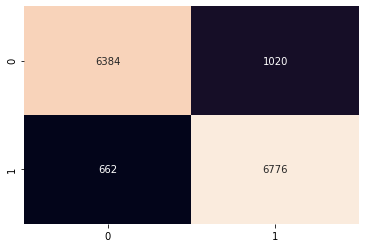

[[6384 1020]
 [ 662 6776]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7404
           1       0.87      0.91      0.89      7438

    accuracy                           0.89     14842
   macro avg       0.89      0.89      0.89     14842
weighted avg       0.89      0.89      0.89     14842

 
 Model Name : LogisticRegression 
Accuracy on training set : 0.8701108378533167
Accuracy on test set: 0.866325293087185
 Confusion Matrix ;


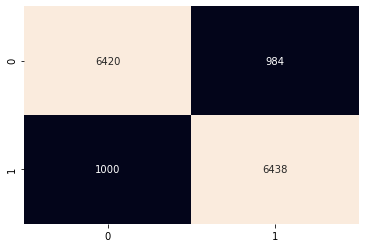

[[6420  984]
 [1000 6438]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7404
           1       0.87      0.87      0.87      7438

    accuracy                           0.87     14842
   macro avg       0.87      0.87      0.87     14842
weighted avg       0.87      0.87      0.87     14842

 
 Model Name : AdaBoostClassifier 
Accuracy on training set : 0.8670282653370616
Accuracy on test set: 0.8678749494677267
 Confusion Matrix ;


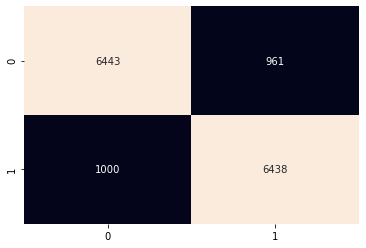

[[6443  961]
 [1000 6438]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7404
           1       0.87      0.87      0.87      7438

    accuracy                           0.87     14842
   macro avg       0.87      0.87      0.87     14842
weighted avg       0.87      0.87      0.87     14842

 
 Model Name : RandomForestClassifier 
Accuracy on training set : 0.9996462621702658
Accuracy on test set: 0.9832232852715268
 Confusion Matrix ;


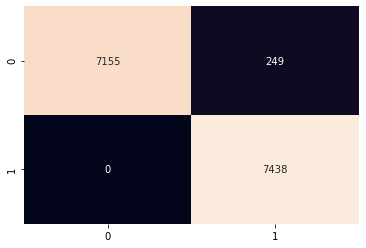

[[7155  249]
 [   0 7438]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7404
           1       0.97      1.00      0.98      7438

    accuracy                           0.98     14842
   macro avg       0.98      0.98      0.98     14842
weighted avg       0.98      0.98      0.98     14842

 
 Model Name : GaussianNB 
Accuracy on training set : 0.7544217228716774
Accuracy on test set: 0.7491577954453578
 Confusion Matrix ;


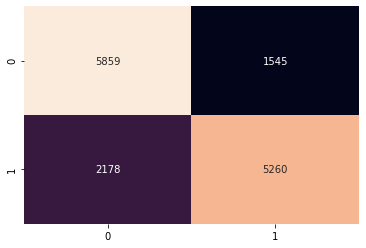

[[5859 1545]
 [2178 5260]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      7404
           1       0.77      0.71      0.74      7438

    accuracy                           0.75     14842
   macro avg       0.75      0.75      0.75     14842
weighted avg       0.75      0.75      0.75     14842

 
 Model Name : LinearDiscriminantAnalysis 
Accuracy on training set : 0.855304382980157
Accuracy on test set: 0.8521088802048241
 Confusion Matrix ;


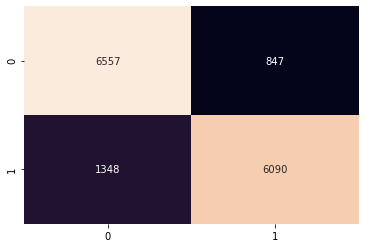

[[6557  847]
 [1348 6090]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7404
           1       0.88      0.82      0.85      7438

    accuracy                           0.85     14842
   macro avg       0.85      0.85      0.85     14842
weighted avg       0.85      0.85      0.85     14842

 


In [50]:
models = (GradientBoostingClassifier(random_state= 123),LogisticRegression(random_state= 123),AdaBoostClassifier(random_state= 123),
                 RandomForestClassifier(random_state= 123),GaussianNB(),LinearDiscriminantAnalysis())

for model in models:
    model_results(model)


Highest F1 score among tried GradientBoostingClassifier(),LogisticRegression(),AdaBoostClassifier(), RandomForestClassifier(), GaussianNB() algorithms is generated from Gradient Boosting with 0.89 rate of F-1 score and the accuracy of the model was also same on test data. 

Since tree Boosting provides better results, I will make some tuning on it. As another thought the results can also be improved by using more powerful boosting algorithms like XGBoost or LightGBM. I will also try them under following codes. 

It is also better to mention that, Random Forest algorithm was overfitted to the dataset as it can be observed from provided results. Although I splited data into train and test chunks, since I generated aroun 37.000 positives(y=1) from apprx 3000 observations, train data might still include all possible positive options, which leads RF to learn the data and overfitted. The trees can be pruned with model tuning, but I won't try to improve it.  

Fistly, I will work on Gradient Boosting as mentioned above by using GridSearch for model hyperparameter tuning. Afterwards, I will also try XGBoost and LightGBM before jumping second dataset. 

### 3.1.1 Gradient Boosting Classifier tuning with df1

In [51]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [ 0.1, 0.2],
    "max_depth":[5,8],
    "n_estimators":[100, 150]
    }

In [52]:
gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid = parameters,refit=False,cv=2, n_jobs=-1)

In [53]:
gb.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [54]:
gb.cv_results_
gb.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 150}

Thanks to 

 Model Name : GradientBoostingClassifier 
Accuracy on training set : 0.9934642724791969
Accuracy on test set: 0.9664465705430535
 Confusion Matrix ;


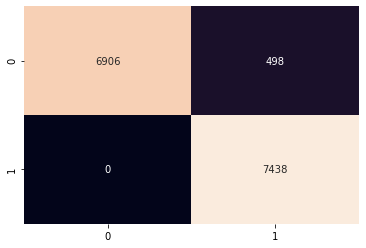

[[6906  498]
 [   0 7438]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      7404
           1       0.94      1.00      0.97      7438

    accuracy                           0.97     14842
   macro avg       0.97      0.97      0.97     14842
weighted avg       0.97      0.97      0.97     14842

 


In [55]:
gbc = (GradientBoostingClassifier(random_state= 123,learning_rate= 0.2, max_depth = 8, n_estimators= 150))
model_results(gbc)

Since both predicing True Positive and True Negatives are equally important, main evaluation criteria on these model outputs is their F1 scores. So, F1 scores of the models will be evaluated, when deciding the final model. 

### 3.1.2 Light GBM training with df1 

Under this subtopics(3.1.2 and 3.1.3) XGBoost and Light GBM models tried with both default hyperparameters and according to their accuracy result, only XGBoost model was tried to improve by tuning some of hyperparameters. Both these models and the ones located above will be implemented in same sequence for both other data options.  

In [56]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

In [71]:
d_train = lgb.Dataset(X_train, label= y_train)
model = lgb.LGBMClassifier()

params = {
 'learning_rate': 0.003,
 'boosting_type': 'gbdt', # boosting type(gradient boosting)
 'objective':'binary',
 'metric' : 'binary_logloss',
 'sub_feature': 0.5,
 'num_leaves': 10,
 'min_data': 50,
 'max_depth': 10
}


lg= lgb.train(params, d_train, num_boost_round=999)
lg_pred = lg.predict(X_test)

#convert into binary values

for i in range(0,y_test.shape[0]):
    if (lg_pred[i] >= 0.5):
        lg_pred[i] = 1
    else:
        lg_pred[i] =0
len(lg_pred)
#calculating accuracy
accuracy_lgbm = accuracy_score(lg_pred,y_test)
print("Accuracy :",accuracy_lgbm)
y_test.value_counts()
#calculating roc_auc_score for light gbm. 
auc_lgbm = roc_auc_score(y_test,lg_pred)

print(confusion_matrix(lg_pred,y_test))
print(classification_report(lg_pred, y_test))



Accuracy : 0.8812154696132597
[[6332  691]
 [1072 6747]]
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      7023
         1.0       0.91      0.86      0.88      7819

    accuracy                           0.88     14842
   macro avg       0.88      0.88      0.88     14842
weighted avg       0.88      0.88      0.88     14842



### 3.1.3 XGBoost training & tuning with df1

In [57]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test, label=y_test)

In [58]:
parameters = {
    "objective":"binary:logistic",
    "eval_metric" : "error",
    "seed" : 123
}

xg=xgb.train(parameters,dtrain, num_boost_round= 50) 
xg_pred=xg.predict(dtest) 
for i in range(0,y_test.shape[0]): 
    if xg_pred[i]>=.5:       # setting threshold to .5 
       xg_pred[i]=1 
    else: 
       xg_pred[i]=0  

accuracy_xgb = accuracy_score(y_test,xg_pred) 
print("Accuracy :", accuracy_xgb)
#calculating roc_auc_score for xgboost
auc_xgb =  roc_auc_score(y_test,xg_pred)
print(auc_xgb)


print(confusion_matrix(xg_pred,y_test))
print(classification_report(xg_pred, y_test))

Accuracy : 0.9283789246732246
0.9282876388263636
[[6578  237]
 [ 826 7201]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6815
         1.0       0.97      0.90      0.93      8027

    accuracy                           0.93     14842
   macro avg       0.93      0.93      0.93     14842
weighted avg       0.93      0.93      0.93     14842



In [59]:
params = {
    # Parameters that I am going to tune.
    'max_depth':11,
    'min_child_weight': 5,
    'learning_rate':0.1,
    'lambda' : 1,
    'objective':'binary:logistic',
}

In [60]:
num_boost_round = 999
params['eval_metric'] = "error"

In [61]:
xgbc = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-error:0.09952
Will train until Test-error hasn't improved in 10 rounds.
[1]	Test-error:0.09089
[2]	Test-error:0.08995
[3]	Test-error:0.08820
[4]	Test-error:0.08584
[5]	Test-error:0.08388
[6]	Test-error:0.08227
[7]	Test-error:0.08092
[8]	Test-error:0.08045
[9]	Test-error:0.07876
[10]	Test-error:0.07829
[11]	Test-error:0.07667
[12]	Test-error:0.07634
[13]	Test-error:0.07607
[14]	Test-error:0.07553
[15]	Test-error:0.07486
[16]	Test-error:0.07506
[17]	Test-error:0.07418
[18]	Test-error:0.07344
[19]	Test-error:0.07304
[20]	Test-error:0.07256
[21]	Test-error:0.07324
[22]	Test-error:0.07283
[23]	Test-error:0.07209
[24]	Test-error:0.07189
[25]	Test-error:0.07182
[26]	Test-error:0.07108
[27]	Test-error:0.07027
[28]	Test-error:0.07000
[29]	Test-error:0.06933
[30]	Test-error:0.06684
[31]	Test-error:0.06502
[32]	Test-error:0.06482
[33]	Test-error:0.06414
[34]	Test-error:0.06360
[35]	Test-error:0.06327
[36]	Test-error:0.06252
[37]	Test-error:0.06246
[38]	Test-error:0.06178
[39]	Test-error:

In [62]:
print("Best error: {:.2f} with {} rounds".format(
                 xgbc.best_score,
                 xgbc.best_iteration+1))

Best error: 0.04 with 178 rounds


As it can be observed, error rate with optimal parameters is resulted with 0.04 after 178 boosting rounds and adding more rounds did not lead any improvement. Now my aim is to improve model results by using cross validation and by tuning  hyperparameters.


In [63]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=123,
    nfold=5,
    metrics={'error'},
    early_stopping_rounds=10
)
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.094233,0.000623,0.100697,0.002551
1,0.087297,0.001958,0.094195,0.003367
2,0.085209,0.000556,0.092309,0.002301
3,0.083314,0.001249,0.091062,0.001400
4,0.082122,0.000608,0.090136,0.001766
...,...,...,...,...
553,0.004590,0.000464,0.032139,0.000421
554,0.004557,0.000483,0.032055,0.000408
555,0.004514,0.000481,0.032055,0.000421
556,0.004476,0.000491,0.032038,0.000418


In [64]:
cv_results['test-error-mean'].min()

0.031971

In [65]:
gridsearch_params = [
    (max_depth, learning_rate)
    for max_depth in range(10,13)
    for learning_rate in np.arange(0.1,0.4,0.1)
]

In [66]:
# Define initial best params and Error
min_error = float("Inf")
best_params = None
for max_depth, learning_rate in gridsearch_params:
    print("CV with max_depth={}, learning_rate={}".format(
                             max_depth,
                             learning_rate))
    # Update parameters
    params['max_depth'] = max_depth
    params['learning_rate'] = learning_rate
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=123,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update Error
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,learning_rate)
print("Best params: {}, {}, error: {}".format(best_params[0], best_params[1], learning_rate))

CV with max_depth=10, learning_rate=0.1
	Error 0.036788799999999997 for 368 rounds
CV with max_depth=10, learning_rate=0.2
	Error 0.0305564 for 374 rounds
CV with max_depth=10, learning_rate=0.30000000000000004
	Error 0.0294612 for 303 rounds
CV with max_depth=10, learning_rate=0.4
	Error 0.0301686 for 187 rounds
CV with max_depth=11, learning_rate=0.1
	Error 0.031971 for 557 rounds
CV with max_depth=11, learning_rate=0.2
	Error 0.032527 for 223 rounds
CV with max_depth=11, learning_rate=0.30000000000000004
	Error 0.028838000000000003 for 320 rounds
CV with max_depth=11, learning_rate=0.4
	Error 0.0290908 for 219 rounds
CV with max_depth=12, learning_rate=0.1
	Error 0.032105800000000004 for 428 rounds
CV with max_depth=12, learning_rate=0.2
	Error 0.030252999999999995 for 315 rounds
CV with max_depth=12, learning_rate=0.30000000000000004
	Error 0.028248600000000002 for 292 rounds
CV with max_depth=12, learning_rate=0.4
	Error 0.028855199999999998 for 155 rounds
Best params: 12, 0.30000

In [67]:
parameters = {
    'max_depth':12,
    'min_child_weight': 5,
    'learning_rate':0.3,
    'lambda' : 1,
    'objective':'binary:logistic',
    'seed' :  123
}

xg=xgb.train(parameters,dtrain, num_boost_round= 50) 
xg_pred=xg.predict(dtest) 
for i in range(0,y_test.shape[0]): 
    if xg_pred[i]>=.5:       # setting threshold to .5 
       xg_pred[i]=1 
    else: 
       xg_pred[i]=0  

accuracy_xgb = accuracy_score(y_test,xg_pred) 
print("Accuracy :", accuracy_xgb)
#calculating roc_auc_score for xgboost
auc_xgb =  roc_auc_score(y_test,xg_pred)
print(auc_xgb)


print(confusion_matrix(xg_pred,y_test))
print(classification_report(xg_pred, y_test))

Accuracy : 0.9615280959439428
0.9614450100662868
[[6850   17]
 [ 554 7421]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      6867
         1.0       1.00      0.93      0.96      7975

    accuracy                           0.96     14842
   macro avg       0.96      0.96      0.96     14842
weighted avg       0.96      0.96      0.96     14842



In [68]:
xgbc = xgb.train(
    parameters,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-error:0.09507
Will train until Test-error hasn't improved in 10 rounds.
[1]	Test-error:0.08503
[2]	Test-error:0.07775
[3]	Test-error:0.07256
[4]	Test-error:0.07021
[5]	Test-error:0.06818
[6]	Test-error:0.06771
[7]	Test-error:0.06468
[8]	Test-error:0.06407
[9]	Test-error:0.06212
[10]	Test-error:0.05990
[11]	Test-error:0.05902
[12]	Test-error:0.05835
[13]	Test-error:0.05720
[14]	Test-error:0.05613
[15]	Test-error:0.05525
[16]	Test-error:0.05370
[17]	Test-error:0.05276
[18]	Test-error:0.05208
[19]	Test-error:0.05134
[20]	Test-error:0.04925
[21]	Test-error:0.04838
[22]	Test-error:0.04824
[23]	Test-error:0.04831
[24]	Test-error:0.04858
[25]	Test-error:0.04824
[26]	Test-error:0.04669
[27]	Test-error:0.04595
[28]	Test-error:0.04575
[29]	Test-error:0.04454
[30]	Test-error:0.04447
[31]	Test-error:0.04420
[32]	Test-error:0.04406
[33]	Test-error:0.04285
[34]	Test-error:0.04245
[35]	Test-error:0.04258
[36]	Test-error:0.04211
[37]	Test-error:0.04204
[38]	Test-error:0.04130
[39]	Test-error:

In [69]:
print("Best error: {:.2f} with {} rounds".format(
                 xgbc.best_score,
                 xgbc.best_iteration+1))

Best error: 0.03 with 130 rounds


In [70]:
xgb_pred=xgbc.predict(dtest) 
for i in range(0,y_test.shape[0]): 
    if xgb_pred[i]>=.5:       # setting threshold to .5 
       xgb_pred[i]=1 
    else: 
       xgb_pred[i]=0  

accuracy_xgb = accuracy_score(y_test,xgb_pred) 
print("Accuracy :", accuracy_xgb)


print(confusion_matrix(xgb_pred,y_test))
print(classification_report(xgb_pred, y_test))

Accuracy : 0.9693437542110228
[[6949    0]
 [ 455 7438]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      6949
         1.0       1.00      0.94      0.97      7893

    accuracy                           0.97     14842
   macro avg       0.97      0.97      0.97     14842
weighted avg       0.97      0.97      0.97     14842



## 3.2 Model Trials with df2

In [143]:
df_bal = pd.concat([pd.DataFrame(df2[df2.y==1].sample(n=df2[df2.y!=1].iloc[:,1].count(), replace=True, random_state=123)), 
                df2[df2.y!=1]])

df_bal.y.value_counts()

1    37104
0    37104
Name: y, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_bal.loc[:,df_bal.columns != "y"],df_bal.y, train_size=0.80, random_state= 123)

for d in X_train, X_test, y_train, y_test:
    name =[x for x in globals() if globals()[x] is d][0]
    print(name, d.shape)

X_train (59366, 40)
X_test (14842, 40)
y_train (59366,)
y_test (14842,)


In [145]:
X_train.head(2)

,default,balance,housing,loan,duration,campaign,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,day_diff,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9
39950,0,0,0,0,1.18,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,213,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39939,0,5887,0,0,3.02,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,213,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing


scaler = ColumnTransformer([('scaler', preprocessing.MinMaxScaler(), ["balance","duration","campaign","day_diff"])], remainder='drop')
a = pd.DataFrame(scaler.fit_transform(X_train), columns= ["balance","duration","campaign","day_diff"]).reset_index(drop=True)
X_train = pd.concat([a,X_train.drop(["balance","duration","campaign","day_diff"], axis=1).reset_index(drop=True)], axis=1)
X_train


,balance,duration,campaign,day_diff,default,housing,loan,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9
0,0.075341,0.018244,0.032258,0.623100,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.130651,0.046691,0.032258,0.623100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.106430,0.089981,0.016129,0.674772,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.075341,0.401979,0.016129,0.641337,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.091257,0.121831,0.080645,0.410334,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59361,0.075341,0.002010,0.080645,0.109422,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
59362,0.073453,0.233148,0.000000,0.115502,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
59363,0.085018,0.102041,0.016129,0.890578,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59364,0.111241,0.167285,0.016129,0.680851,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
a = pd.DataFrame(scaler.transform(X_test), columns= ["balance","duration","campaign","day_diff"]).reset_index(drop=True)
X_test = pd.concat([a,X_test.drop(["balance","duration","campaign","day_diff"], axis=1).reset_index(drop=True)], axis=1)
X_test

,balance,duration,campaign,day_diff,default,housing,loan,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9
0,0.077821,0.029066,0.000000,0.696049,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.107774,0.002010,0.129032,0.358663,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.089246,0.036797,0.000000,0.665653,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.335554,0.027829,0.000000,0.720365,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.116323,0.061379,0.000000,0.601824,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14837,0.083158,0.032468,0.000000,0.632219,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14838,0.074852,0.071583,0.000000,0.665653,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14839,0.158988,0.086580,0.080645,0.109422,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14840,0.100511,0.076067,0.032258,0.112462,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [170]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

 Model Name : GradientBoostingClassifier 
Accuracy on training set : 0.8994542330626958
Accuracy on test set: 0.8952971297668778
 Confusion Matrix ;


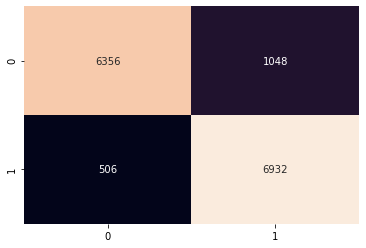

[[6356 1048]
 [ 506 6932]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      7404
           1       0.87      0.93      0.90      7438

    accuracy                           0.90     14842
   macro avg       0.90      0.90      0.90     14842
weighted avg       0.90      0.90      0.90     14842

 
 Model Name : LogisticRegression 
Accuracy on training set : 0.8414917629619647
Accuracy on test set: 0.8376229618649778
 Confusion Matrix ;


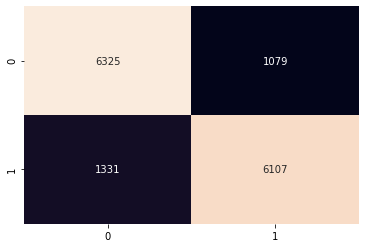

[[6325 1079]
 [1331 6107]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7404
           1       0.85      0.82      0.84      7438

    accuracy                           0.84     14842
   macro avg       0.84      0.84      0.84     14842
weighted avg       0.84      0.84      0.84     14842

 
 Model Name : AdaBoostClassifier 
Accuracy on training set : 0.8748947208840077
Accuracy on test set: 0.8740061986255222
 Confusion Matrix ;


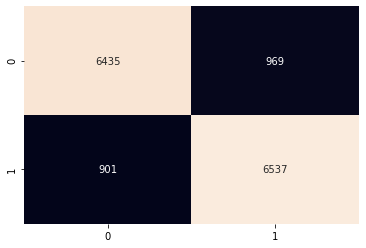

[[6435  969]
 [ 901 6537]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7404
           1       0.87      0.88      0.87      7438

    accuracy                           0.87     14842
   macro avg       0.87      0.87      0.87     14842
weighted avg       0.87      0.87      0.87     14842

 
 Model Name : RandomForestClassifier 
Accuracy on training set : 0.9996125728531483
Accuracy on test set: 0.9832232852715268
 Confusion Matrix ;


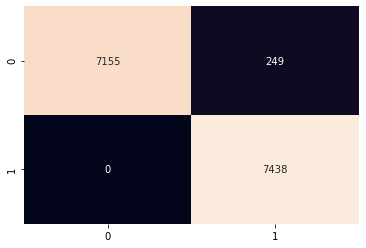

[[7155  249]
 [   0 7438]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7404
           1       0.97      1.00      0.98      7438

    accuracy                           0.98     14842
   macro avg       0.98      0.98      0.98     14842
weighted avg       0.98      0.98      0.98     14842

 
 Model Name : GaussianNB 
Accuracy on training set : 0.6484014419027726
Accuracy on test set: 0.6468130979652338
 Confusion Matrix ;


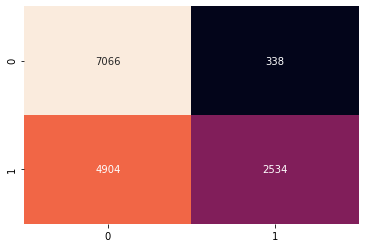

[[7066  338]
 [4904 2534]]
              precision    recall  f1-score   support

           0       0.59      0.95      0.73      7404
           1       0.88      0.34      0.49      7438

    accuracy                           0.65     14842
   macro avg       0.74      0.65      0.61     14842
weighted avg       0.74      0.65      0.61     14842

 
 Model Name : LinearDiscriminantAnalysis 
Accuracy on training set : 0.8313007445339083
Accuracy on test set: 0.8273817544805282
 Confusion Matrix ;


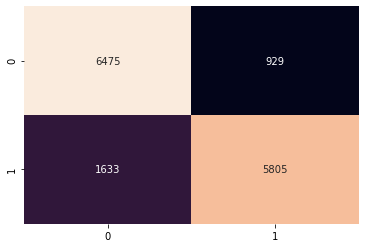

[[6475  929]
 [1633 5805]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      7404
           1       0.86      0.78      0.82      7438

    accuracy                           0.83     14842
   macro avg       0.83      0.83      0.83     14842
weighted avg       0.83      0.83      0.83     14842

 


In [148]:
models = (GradientBoostingClassifier(random_state= 123),LogisticRegression(random_state= 123),AdaBoostClassifier(random_state= 123),
                 RandomForestClassifier(random_state= 123),GaussianNB(),LinearDiscriminantAnalysis())

for model in models:
    model_results(model)


### 3.2 Gradient Boosting Classifier tuning with df2

In [149]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.1, 0.2,0.3],
    "max_depth":[8,10,12],
    "n_estimators":[100, 150,250]
    }

In [150]:

gb2 = GradientBoostingClassifier(random_state= 123)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 123)

random_search2 = RandomizedSearchCV(gb2, param_distributions=parameters, n_iter=param_comb, cv=skf.split(X_train,y_train),
                                   scoring='roc_auc', n_jobs=4, verbose=3, random_state=123 )


In [151]:
random_search2.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 48.8min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001C54D71F480>,
                   error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split...
                                

In [152]:
random_search2.cv_results_
random_search2.best_params_

{'n_estimators': 250, 'max_depth': 12, 'learning_rate': 0.1}

 Model Name : GradientBoostingClassifier 
Accuracy on training set : 1.0
Accuracy on test set: 0.9770920361137313
 Confusion Matrix ;


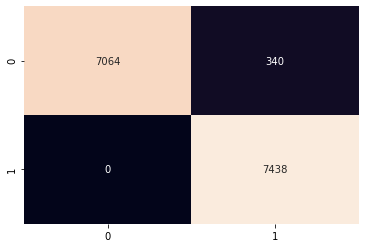

[[7064  340]
 [   0 7438]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      7404
           1       0.96      1.00      0.98      7438

    accuracy                           0.98     14842
   macro avg       0.98      0.98      0.98     14842
weighted avg       0.98      0.98      0.98     14842

 


In [82]:
gbc2 = (GradientBoostingClassifier(random_state= 123,learning_rate= 0.1, max_depth = 12, n_estimators= 250))
model_results(gbc2)

In [ ]:
pickle.dump(gbc2, open("model_gb5050.pkl", "wb"))

### 3.2.2 Light GBM training with df2

In [83]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

In [138]:
d_train = lgb.Dataset(X_train, label= y_train)
model = lgb.LGBMClassifier()

params = {
 'learning_rate': 0.003,
 'boosting_type': 'gbdt', # boosting type(gradient boosting)
 'objective':'binary',
 'metric' : 'binary_logloss',
 'sub_feature': 0.5,
 'num_leaves': 10,
 'min_data': 50,
 'max_depth': 10
}


lg2= lgb.train(params, d_train, num_boost_round=999)
lg_pred2 = lg2.predict(X_test)

#convert into binary values

for i in range(0,y_test.shape[0]):
    if (lg_pred2[i] >= 0.5):
        lg_pred2[i] = 1
    else:
        lg_pred2[i] =0
len(lg_pred2)
#calculating accuracy
accuracy_lgbm2 = accuracy_score(lg_pred2,y_test)
print("Accuracy :",accuracy_lgbm2)
y_test.value_counts()
#calculating roc_auc_score for light gbm. 
auc_lgbm2 = roc_auc_score(y_test,lg_pred2)

print(confusion_matrix(lg_pred2,y_test))
print(classification_report(lg_pred2, y_test))



Accuracy : 0.8905807842608813
[[6389  609]
 [1015 6829]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89      6998
         1.0       0.92      0.87      0.89      7844

    accuracy                           0.89     14842
   macro avg       0.89      0.89      0.89     14842
weighted avg       0.89      0.89      0.89     14842



### 3.2.3 XGBoost training & tuning with df2

In [136]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test, label=y_test)

In [85]:
parameters = {
    "objective":"binary:logistic",
    "eval_metric" : "error",
    "seed" : 123
}

xg2=xgb.train(parameters,dtrain, num_boost_round= 50) 
xg_pred2=xg2.predict(dtest) 
for i in range(0,y_test.shape[0]): 
    if xg_pred2[i]>=.5:       # setting threshold to .5 
       xg_pred2[i]=1 
    else: 
       xg_pred2[i]=0  

accuracy_xgb2 = accuracy_score(y_test,xg_pred2) 
print("Accuracy :", accuracy_xgb2)
#calculating roc_auc_score for xgboost
auc_xgb2 =  roc_auc_score(y_test,xg_pred2)
print(auc_xgb2)


print(confusion_matrix(xg_pred2,y_test))
print(classification_report(xg_pred2, y_test))

Accuracy : 0.9353186902034766
0.9352229647310255
[[6615  171]
 [ 789 7267]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6786
         1.0       0.98      0.90      0.94      8056

    accuracy                           0.94     14842
   macro avg       0.94      0.94      0.94     14842
weighted avg       0.94      0.94      0.94     14842



In [94]:
params = {
    # Parameters that I am going to tune.
    'max_depth':11,
    'min_child_weight': 5,
    'learning_rate':0.1,
    'lambda' : 1,
    'objective':'binary:logistic',
}

In [95]:
num_boost_round = 999
params['eval_metric'] = "error"

In [96]:
xgbc2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-error:0.08105
Will train until Test-error hasn't improved in 10 rounds.
[1]	Test-error:0.07654
[2]	Test-error:0.07600
[3]	Test-error:0.07411
[4]	Test-error:0.07364
[5]	Test-error:0.07054
[6]	Test-error:0.06872
[7]	Test-error:0.06744
[8]	Test-error:0.06589
[9]	Test-error:0.06542
[10]	Test-error:0.06535
[11]	Test-error:0.06367
[12]	Test-error:0.06280
[13]	Test-error:0.06178
[14]	Test-error:0.06138
[15]	Test-error:0.06084
[16]	Test-error:0.05983
[17]	Test-error:0.05969
[18]	Test-error:0.05889
[19]	Test-error:0.05835
[20]	Test-error:0.05788
[21]	Test-error:0.05767
[22]	Test-error:0.05761
[23]	Test-error:0.05740
[24]	Test-error:0.05639
[25]	Test-error:0.05619
[26]	Test-error:0.05532
[27]	Test-error:0.05444
[28]	Test-error:0.05424
[29]	Test-error:0.05309
[30]	Test-error:0.05255
[31]	Test-error:0.05161
[32]	Test-error:0.05134
[33]	Test-error:0.05094
[34]	Test-error:0.05026
[35]	Test-error:0.05019
[36]	Test-error:0.04959
[37]	Test-error:0.04905
[38]	Test-error:0.04885
[39]	Test-error:

In [97]:
print("Best error: {:.2f} with {} rounds".format(
                 xgbc2.best_score,
                 xgbc2.best_iteration+1))

Best error: 0.04 with 186 rounds


As it can be observed, error rate with optimal parameters is resulted with 0.04 after 249 boosting rounds and adding more rounds did not lead any improvement. Now my aim is to improve model results by using cross validation and by tuning  hyperparameters.


In [98]:
cv_results2 = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=123,
    nfold=5,
    metrics={'error'},
    early_stopping_rounds=10
)
cv_results2

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.075422,0.000937,0.084459,0.002298
1,0.071232,0.000950,0.079641,0.001702
2,0.067244,0.001970,0.075835,0.003214
3,0.065408,0.001973,0.073813,0.002689
4,0.064380,0.002031,0.073123,0.002099
...,...,...,...,...
280,0.012806,0.001022,0.036014,0.000896
281,0.012756,0.001096,0.035930,0.000965
282,0.012739,0.001090,0.035778,0.001043
283,0.012701,0.001097,0.035761,0.001037


In [99]:
cv_results2['test-error-mean'].min()

0.035710599999999995

In [100]:
gridsearch_params = [
    (max_depth, learning_rate)
    for max_depth in range(10,13)
    for learning_rate in np.arange(0.1,0.4,0.1)
]

In [101]:
# Define initial best params and error
min_error = float("Inf")
best_params = None
for max_depth, learning_rate in gridsearch_params:
    print("CV with max_depth={}, learning_rate={}".format(
                             max_depth,
                             learning_rate))
    # Update parameters
    params['max_depth'] = max_depth
    params['learning_rate'] = learning_rate
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=123,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update min Error 
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,learning_rate)
print("Best params: {}, {}, error: {}".format(best_params[0], best_params[1], learning_rate))

CV with max_depth=10, learning_rate=0.1
	Error 0.0350202 for 390 rounds
CV with max_depth=10, learning_rate=0.2
	Error 0.03139840000000001 for 325 rounds
CV with max_depth=10, learning_rate=0.30000000000000004
	Error 0.030286599999999997 for 251 rounds
CV with max_depth=10, learning_rate=0.4
	Error 0.0291416 for 244 rounds
CV with max_depth=11, learning_rate=0.1
	Error 0.035710599999999995 for 284 rounds
CV with max_depth=11, learning_rate=0.2
	Error 0.030236000000000002 for 356 rounds
CV with max_depth=11, learning_rate=0.30000000000000004
	Error 0.031179400000000003 for 171 rounds
CV with max_depth=11, learning_rate=0.4
	Error 0.02963 for 179 rounds
CV with max_depth=12, learning_rate=0.1
	Error 0.031145999999999997 for 475 rounds
CV with max_depth=12, learning_rate=0.2
	Error 0.0325944 for 177 rounds
CV with max_depth=12, learning_rate=0.30000000000000004
	Error 0.028585199999999998 for 228 rounds
CV with max_depth=12, learning_rate=0.4
	Error 0.029225400000000002 for 174 rounds
Bes

In [137]:
parameters = {
    'max_depth':12,
    'min_child_weight': 5,
    'learning_rate':0.3,
    'lambda' : 1,
    'objective':'binary:logistic',
    'seed' :  123
}

xg2=xgb.train(parameters,dtrain, num_boost_round= 50) 
xg_pred2=xg2.predict(dtest) 
for i in range(0,y_test.shape[0]): 
    if xg_pred2[i]>=.5:       # setting threshold to .5 
       xg_pred2[i]=1 
    else: 
       xg_pred2[i]=0  

accuracy_xgb2 = accuracy_score(y_test,xg_pred2) 
print("Accuracy :", accuracy_xgb2)
#calculating roc_auc_score for xgboost
auc_xgb2 =  roc_auc_score(y_test,xg_pred2)
print(auc_xgb2)


print(confusion_matrix(xg_pred2,y_test))
print(classification_report(xg_pred2, y_test))

Accuracy : 0.9630777523244846
0.9629951376181041
[[6863    7]
 [ 541 7431]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      6870
         1.0       1.00      0.93      0.96      7972

    accuracy                           0.96     14842
   macro avg       0.96      0.97      0.96     14842
weighted avg       0.97      0.96      0.96     14842



## 3.3 Model Trials with df3

In [102]:
df_bal = pd.concat([pd.DataFrame(df3[df3.y==1].sample(n=df3[df3.y!=1].iloc[:,1].count(), replace=True, random_state=123)), 
                df3[df3.y!=1]])

df_bal.y.value_counts()

1    37104
0    37104
Name: y, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_bal.loc[:,df_bal.columns != "y"],df_bal.y, train_size=0.80, random_state= 123)

for d in X_train, X_test, y_train, y_test:
    name =[x for x in globals() if globals()[x] is d][0]
    print(name, d.shape)

X_train (59366, 43)
X_test (14842, 43)
y_train (59366,)
y_test (14842,)


In [104]:
X_train.head(2)

,default,balance,housing,loan,duration,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,day_diff,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9,campaign_1,campaign_2,campaign_3,campaign_4
39950,0,0,0,0,1.18,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,213,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
39939,0,5887,0,0,3.02,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,213,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0


In [105]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing


transformer = ColumnTransformer([('scaler', preprocessing.QuantileTransformer(), ["balance","duration"])], remainder='drop')
a = pd.DataFrame(transformer.fit_transform(X_train), columns= ["balance","duration"]).reset_index(drop=True)
X_train = pd.concat([a,X_train.drop(["balance","duration"], axis=1).reset_index(drop=True)], axis=1)
X_train


,balance,duration,default,housing,loan,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,day_diff,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9,campaign_1,campaign_2,campaign_3,campaign_4
0,0.118619,0.079580,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,213,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1,0.951952,0.323824,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,213,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
2,0.879572,0.537204,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,230,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,0.118619,0.981982,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,219,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
4,0.767017,0.627628,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,143,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59361,0.118619,0.002002,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,44,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
59362,0.045474,0.867034,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,46,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
59363,0.663163,0.574575,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,301,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
59364,0.902111,0.742743,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,232,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0


In [106]:
a = pd.DataFrame(transformer.transform(X_test), columns= ["balance","duration"]).reset_index(drop=True)
X_test = pd.concat([a,X_test.drop(["balance","duration"], axis=1).reset_index(drop=True)], axis=1)
X_test

,balance,duration,default,housing,loan,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,day_diff,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9,campaign_1,campaign_2,campaign_3,campaign_4
0,0.377878,0.173674,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,237,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,0.886579,0.002002,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,126,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
2,0.740598,0.241742,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,227,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,0.998432,0.161662,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,245,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,0.917529,0.416917,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,206,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14837,0.615741,0.204705,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,216,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
14838,0.068211,0.467968,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,227,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
14839,0.977245,0.526026,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,44,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
14840,0.846933,0.484484,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,45,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0


 Model Name : GradientBoostingClassifier 
Accuracy on training set : 0.8987972913789037
Accuracy on test set: 0.8954992588599919
 Confusion Matrix ;


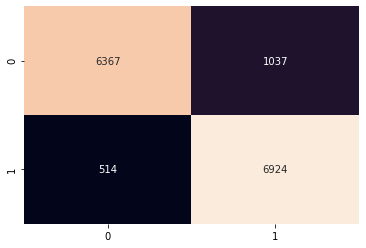

[[6367 1037]
 [ 514 6924]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      7404
           1       0.87      0.93      0.90      7438

    accuracy                           0.90     14842
   macro avg       0.90      0.90      0.90     14842
weighted avg       0.90      0.90      0.90     14842

 
 Model Name : LogisticRegression 
Accuracy on training set : 0.8379543846646228
Accuracy on test set: 0.8341193909176661
 Confusion Matrix ;


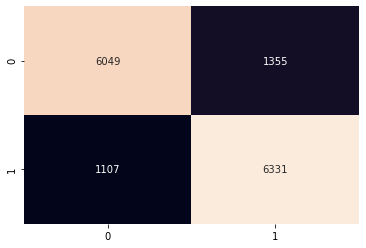

[[6049 1355]
 [1107 6331]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      7404
           1       0.82      0.85      0.84      7438

    accuracy                           0.83     14842
   macro avg       0.83      0.83      0.83     14842
weighted avg       0.83      0.83      0.83     14842

 
 Model Name : AdaBoostClassifier 
Accuracy on training set : 0.8748947208840077
Accuracy on test set: 0.8740061986255222
 Confusion Matrix ;


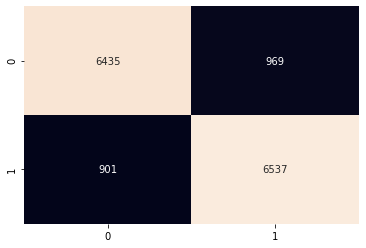

[[6435  969]
 [ 901 6537]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7404
           1       0.87      0.88      0.87      7438

    accuracy                           0.87     14842
   macro avg       0.87      0.87      0.87     14842
weighted avg       0.87      0.87      0.87     14842

 
 Model Name : RandomForestClassifier 
Accuracy on training set : 0.9996125728531483
Accuracy on test set: 0.9840991780083547
 Confusion Matrix ;


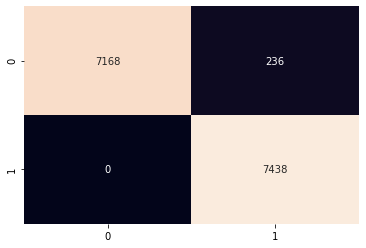

[[7168  236]
 [   0 7438]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7404
           1       0.97      1.00      0.98      7438

    accuracy                           0.98     14842
   macro avg       0.98      0.98      0.98     14842
weighted avg       0.98      0.98      0.98     14842

 
 Model Name : GaussianNB 
Accuracy on training set : 0.5728363036081259
Accuracy on test set: 0.5719579571486323
 Confusion Matrix ;


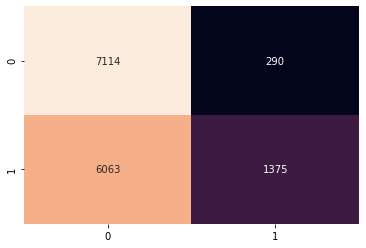

[[7114  290]
 [6063 1375]]
              precision    recall  f1-score   support

           0       0.54      0.96      0.69      7404
           1       0.83      0.18      0.30      7438

    accuracy                           0.57     14842
   macro avg       0.68      0.57      0.50     14842
weighted avg       0.68      0.57      0.50     14842

 
 Model Name : LinearDiscriminantAnalysis 
Accuracy on training set : 0.835815113027659
Accuracy on test set: 0.8358038000269505
 Confusion Matrix ;


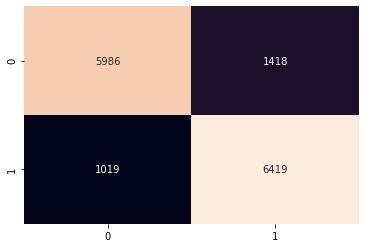

[[5986 1418]
 [1019 6419]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      7404
           1       0.82      0.86      0.84      7438

    accuracy                           0.84     14842
   macro avg       0.84      0.84      0.84     14842
weighted avg       0.84      0.84      0.84     14842

 


In [107]:
models = (GradientBoostingClassifier(random_state= 123),LogisticRegression(random_state= 123),AdaBoostClassifier(random_state= 123),
                 RandomForestClassifier(random_state= 123),GaussianNB(),LinearDiscriminantAnalysis())

for model in models:
    model_results(model)

### 3.3.1 Gradient Boosting Classifier tuning with df3

In [108]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.1, 0.2,0.3],
    "max_depth":[8,10,12],
    "n_estimators":[100, 150,250]
    }

In [109]:

gbc = GradientBoostingClassifier(random_state= 123)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 123)

random_search3 = RandomizedSearchCV(gbc, param_distributions=parameters, n_iter=param_comb, cv=skf.split(X_train,y_train),
                                   scoring='roc_auc', n_jobs=4, verbose=3, random_state=123 )


In [110]:
random_search3.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 40.5min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001C544CAADE0>,
                   error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split...
                                

In [111]:
random_search3.cv_results_
random_search3.best_params_

{'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.3}

 Model Name : GradientBoostingClassifier 
Accuracy on training set : 1.0
Accuracy on test set: 0.9785743161299016
 Confusion Matrix ;


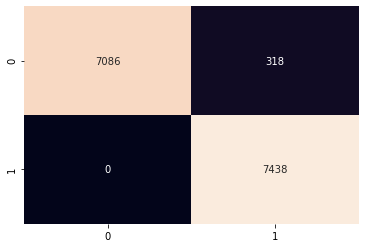

[[7086  318]
 [   0 7438]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      7404
           1       0.96      1.00      0.98      7438

    accuracy                           0.98     14842
   macro avg       0.98      0.98      0.98     14842
weighted avg       0.98      0.98      0.98     14842

 


In [130]:
gbc3 = (GradientBoostingClassifier(random_state= 123,learning_rate= 0.3, max_depth = 10, n_estimators= 250))
model_results(gbc3)

### 3.3.2 XGBoost training & tuning with df3

In [113]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb 

In [114]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test, label=y_test)

In [116]:
parameters = {
    "objective":"binary:logistic",
    "eval_metric" : "error",
    "seed" : 123
}

xg3=xgb.train(parameters,dtrain, num_boost_round= 50) 
xg_pred3=xg.predict(dtest) 
for i in range(0,y_test.shape[0]): 
    if xg_pred3[i]>=.5:       # setting threshold to .5 
       xg_pred3[i]=1 
    else: 
       xg_pred3[i]=0  

accuracy_xgb3 = accuracy_score(y_test,xg_pred3) 
print("Accuracy :", accuracy_xgb3)
#calculating roc_auc_score for xgboost
auc_xgb3 =  roc_auc_score(y_test,xg_pred3)
print(auc_xgb3)


print(confusion_matrix(xg_pred3,y_test))
print(classification_report(xg_pred3, y_test))

Accuracy : 0.9329605174504784
0.9328652426418922
[[6599  190]
 [ 805 7248]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6789
         1.0       0.97      0.90      0.94      8053

    accuracy                           0.93     14842
   macro avg       0.93      0.94      0.93     14842
weighted avg       0.94      0.93      0.93     14842



In [117]:
params = {
    # Parameters that I am going to tune.
    'max_depth':11,
    'min_child_weight': 5,
    'learning_rate':0.1,
    'lambda' : 1,
    'objective':'binary:logistic',
}

In [118]:
num_boost_round = 999
params['eval_metric'] = "error"

In [119]:
xgbc3 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-error:0.08166
Will train until Test-error hasn't improved in 10 rounds.
[1]	Test-error:0.07533
[2]	Test-error:0.07492
[3]	Test-error:0.07263
[4]	Test-error:0.07162
[5]	Test-error:0.06953
[6]	Test-error:0.06845
[7]	Test-error:0.06684
[8]	Test-error:0.06488
[9]	Test-error:0.06468
[10]	Test-error:0.06414
[11]	Test-error:0.06381
[12]	Test-error:0.06280
[13]	Test-error:0.06192
[14]	Test-error:0.06165
[15]	Test-error:0.06091
[16]	Test-error:0.06091
[17]	Test-error:0.06057
[18]	Test-error:0.06037
[19]	Test-error:0.05969
[20]	Test-error:0.05821
[21]	Test-error:0.05794
[22]	Test-error:0.05740
[23]	Test-error:0.05613
[24]	Test-error:0.05518
[25]	Test-error:0.05417
[26]	Test-error:0.05350
[27]	Test-error:0.05309
[28]	Test-error:0.05242
[29]	Test-error:0.05222
[30]	Test-error:0.05188
[31]	Test-error:0.05222
[32]	Test-error:0.05094
[33]	Test-error:0.05019
[34]	Test-error:0.04966
[35]	Test-error:0.04898
[36]	Test-error:0.04878
[37]	Test-error:0.04831
[38]	Test-error:0.04811
[39]	Test-error:

In [120]:
print("Best error: {:.2f} with {} rounds".format(
                 xgbc3.best_score,
                 xgbc3.best_iteration+1))

Best error: 0.04 with 131 rounds


As it can be observed, error rate with optimal parameters is resulted with 0.04 after 249 boosting rounds and adding more rounds did not lead any improvement. Now my aim is to improve model results by using cross validation and by tuning  hyperparameters.


In [121]:
cv_results3 = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=123,
    nfold=5,
    metrics={'error'},
    early_stopping_rounds=10
)
cv_results3

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.075413,0.000867,0.085183,0.003075
1,0.070802,0.001667,0.079877,0.003327
2,0.067197,0.001856,0.076963,0.002306
3,0.065782,0.001849,0.074925,0.001749
4,0.063930,0.002291,0.073982,0.002366
...,...,...,...,...
503,0.004161,0.000324,0.032022,0.001388
504,0.004161,0.000325,0.032039,0.001403
505,0.004140,0.000335,0.031971,0.001407
506,0.004098,0.000342,0.031954,0.001406


In [122]:
cv_results3['test-error-mean'].min()

0.0319206

In [123]:
gridsearch_params = [
    (max_depth, learning_rate)
    for max_depth in range(10,13)
    for learning_rate in np.arange(0.1,0.4,0.1)
]

In [124]:
# Define initial best params and error
min_error = float("Inf")
best_params = None
for max_depth, learning_rate in gridsearch_params:
    print("CV with max_depth={}, learning_rate={}".format(
                             max_depth,
                             learning_rate))
    # Update parameters
    params['max_depth'] = max_depth
    params['learning_rate'] = learning_rate
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=123,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=10
    )
    # Update min Error 
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\tError {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = (max_depth,learning_rate)


CV with max_depth=10, learning_rate=0.1
	Error 0.034599 for 437 rounds
CV with max_depth=10, learning_rate=0.2
	Error 0.033706 for 230 rounds
CV with max_depth=10, learning_rate=0.30000000000000004
	Error 0.0320722 for 184 rounds
CV with max_depth=10, learning_rate=0.4
	Error 0.0293604 for 191 rounds
CV with max_depth=11, learning_rate=0.1
	Error 0.0319206 for 507 rounds
CV with max_depth=11, learning_rate=0.2
	Error 0.0310952 for 274 rounds
CV with max_depth=11, learning_rate=0.30000000000000004
	Error 0.0291242 for 274 rounds
CV with max_depth=11, learning_rate=0.4
	Error 0.0285688 for 222 rounds
CV with max_depth=12, learning_rate=0.1
	Error 0.032948 for 368 rounds
CV with max_depth=12, learning_rate=0.2
	Error 0.030674 for 258 rounds
CV with max_depth=12, learning_rate=0.30000000000000004
	Error 0.029393999999999997 for 216 rounds
CV with max_depth=12, learning_rate=0.4
	Error 0.028956000000000003 for 181 rounds


In [125]:
print("Best params: {}, {}, error: {}".format(best_params[0], best_params[1], learning_rate))

Best params: 11, 0.4, error: 0.4


In [126]:
parameters = {
    'max_depth':11,
    'min_child_weight': 5,
    'learning_rate':0.4,
    'lambda' : 1,
    'objective':'binary:logistic',
    'seed' :  123
}

xg3=xgb.train(parameters,dtrain, num_boost_round= 50) 
xg_pred3=xg3.predict(dtest) 
for i in range(0,y_test.shape[0]): 
    if xg_pred3[i]>=.5:       # setting threshold to .5 
       xg_pred3[i]=1 
    else: 
       xg_pred3[i]=0  

accuracy_xgb3 = accuracy_score(y_test,xg_pred3) 
print("Accuracy :", accuracy_xgb3)
#calculating roc_auc_score for xgboost
auc_xgb3 =  roc_auc_score(y_test,xg_pred3)
print(auc_xgb3)


print(confusion_matrix(xg_pred3,y_test))
print(classification_report(xg_pred3, y_test))

Accuracy : 0.9657054305349684
0.9656276143546602
[[6898    3]
 [ 506 7435]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      6901
         1.0       1.00      0.94      0.97      7941

    accuracy                           0.97     14842
   macro avg       0.97      0.97      0.97     14842
weighted avg       0.97      0.97      0.97     14842



In [127]:
xgb3 = xgb.train(
    parameters,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-error:0.08166
Will train until Test-error hasn't improved in 10 rounds.
[1]	Test-error:0.07149
[2]	Test-error:0.06482
[3]	Test-error:0.06104
[4]	Test-error:0.05929
[5]	Test-error:0.05794
[6]	Test-error:0.05404
[7]	Test-error:0.05174
[8]	Test-error:0.04892
[9]	Test-error:0.04743
[10]	Test-error:0.04662
[11]	Test-error:0.04521
[12]	Test-error:0.04447
[13]	Test-error:0.04454
[14]	Test-error:0.04386
[15]	Test-error:0.04285
[16]	Test-error:0.04272
[17]	Test-error:0.04197
[18]	Test-error:0.04191
[19]	Test-error:0.04184
[20]	Test-error:0.04191
[21]	Test-error:0.04157
[22]	Test-error:0.04070
[23]	Test-error:0.03995
[24]	Test-error:0.03941
[25]	Test-error:0.03921
[26]	Test-error:0.03901
[27]	Test-error:0.03888
[28]	Test-error:0.03847
[29]	Test-error:0.03834
[30]	Test-error:0.03760
[31]	Test-error:0.03753
[32]	Test-error:0.03719
[33]	Test-error:0.03739
[34]	Test-error:0.03719
[35]	Test-error:0.03652
[36]	Test-error:0.03652
[37]	Test-error:0.03625
[38]	Test-error:0.03598
[39]	Test-error:

In [128]:
print("Best error: {:.2f} with {} rounds".format(
                 xgb3.best_score,
                 xgb3.best_iteration+1))

Best error: 0.03 with 110 rounds


In [129]:
xgb_pred3=xgb3.predict(dtest) 
for i in range(0,y_test.shape[0]): 
    if xgb_pred3[i]>=.5:       # setting threshold to .5 
       xgb_pred3[i]=1 
    else: 
       xgb_pred3[i]=0  

accuracy_xgb3 = accuracy_score(y_test,xgb_pred3) 
print("Accuracy :", accuracy_xgb3)


print(confusion_matrix(xgb_pred3,y_test))
print(classification_report(xgb_pred3, y_test))

Accuracy : 0.9718366796927638
[[6986    0]
 [ 418 7438]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      6986
         1.0       1.00      0.95      0.97      7856

    accuracy                           0.97     14842
   macro avg       0.97      0.97      0.97     14842
weighted avg       0.97      0.97      0.97     14842



# 4. Evaluation of Results

In [167]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features 
fit = SelectKBest(score_func=chi2, k=10).fit(X_train, y_train)
featureScores = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(fit.scores_)],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(19,'Score'))  #print 10 best features

                 Specs        Score
1             duration  1800.096139
28     contact_unknown  1520.775328
26    contact_cellular   563.428620
21      marital_single   364.830050
30         age_chunk_0   314.587895
24  education_tertiary   312.927303
5              housing   298.458213
20     marital_married   295.971960
36         age_chunk_6   235.538550
8      job_blue-collar   209.673751
15         job_student   182.015254
6                 loan   171.786431
37         age_chunk_7   162.343907
22   education_primary   145.515931
34         age_chunk_4   126.534294
29             quarter    88.479736
12         job_retired    86.235030
33         age_chunk_3    81.599369
11      job_management    58.694276


Among all model and data transformation trials mentioned above, best results were generated from tuned Gradient Boosting Classifier training with 2. version of data transformation(gb2). In that case, a function called **"predict_td"** is created to use with raw data. That function can be used with new data without any transformation to make predictions with pre trained model. However, for using that function, all files shared in the repository with ***.pkl*** extention(transformer.pkl, scaler.pkl, model_gb5050.pkl) should be downloaded and put into the working directory beforehand. 

Moreover, from the code output above, the most important features were listed according to their importance from higher to lower. In other words, for example "duration" is resulted as the most decisive feature for "y" and it followed by unknown and cellular contact types. To explain more clearly, if a customer contacted with cellular and contact duration is high and also one is single and youngest among others, that customer is more likely to subscribe Term Deposit. 

In [177]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer,MinMaxScaler
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing  
from sklearn.metrics import accuracy_score 

job_columns = ['job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
marital_columns = ['marital_divorced', 'marital_married', 'marital_single']
education_columns = ['education_primary', 'education_secondary', 'education_tertiary','education_unknown']
contact_columns = ['contact_cellular', 'contact_telephone','contact_unknown']
all_dummy_columns = job_columns + marital_columns + education_columns + contact_columns

def predict_td(df):
    data = df.copy()
    data.duration = round(data.duration/60,2)
    for col in ["default","housing","loan"]:
        data[col] = data[col].map({"yes":1, "no":0})
    for col in ["job","marital","education","contact"]:
        data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], prefix=col)], axis=1)
    for col in all_dummy_columns:
        if col not in data.columns :
            data[col]=0
    data. month = data.month.apply(lambda x : datetime.datetime.strptime(x, "%b").month)
    data = data.assign(day_diff = 365-(data.day + ((data.month-1)*30)))
    data = data.assign(quarter = np.where(data.month<4, 1, np.where(data.month<7,2, np.where(data.month<10,3,4))))
    data = data.drop(["day","month"], axis=1)
    transformer = pickle.load(open('transformer.pkl', 'rb'))
    data = pd.concat([data.drop("age",axis=1).reset_index(drop=True),
                 pd.DataFrame.sparse.from_spmatrix(transformer.transform(np.array(data.age).reshape(-1,1))).add_prefix('age_chunk_')], axis=1) 
    scaler = pickle.load(open('scaler.pkl', 'rb'))
    a = pd.DataFrame(scaler.transform(data), columns= ["balance","duration","campaign","day_diff"]).reset_index(drop=True)
    data = pd.concat([a,data.drop(["balance","duration","campaign","day_diff"], axis=1).reset_index(drop=True)], axis=1)
    model = pickle.load(open("model_gb5050.pkl", 'rb'))
    if [col for col in data.columns if  col=="y"]!=[]:
        data.y = data.y.map({"yes":1, "no":0})
        pred=model.predict(data.loc[:,data.columns != "y"])
        print("Accuracy on data :" , model.score(pred, data.y))
    else:
        pred=model.predict(data)
        data = data.assign(y=None)
        data.y = pred
    for i in range(0,len(data)):
        print("Predictions of {} customer on Term Deposit subscribtion propensity is {}".format(i,(np.where(data.y.iloc[i,]==1,
                                                                                                          "Yes","No"))))
        

In [179]:
data = df[df.y=="yes"].head()

In [180]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
83,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,yes
86,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,yes
168,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,yes


In [181]:
predict_td(data)

Accuracy on data : 100.0
Predictions of 0 customer on Term Deposit subscribtion propensity is Yes
Predictions of 1 customer on Term Deposit subscribtion propensity is Yes
Predictions of 2 customer on Term Deposit subscribtion propensity is Yes
Predictions of 3 customer on Term Deposit subscribtion propensity is Yes
Predictions of 4 customer on Term Deposit subscribtion propensity is Yes


# 5. Clustering Customers

Customer segmentation is also attacted company's attention to recognize customers with similar characteristics. To segment customers, there are several clustering algorithms, which are dissociate regarding to their approach and calculation method. In this section I will use k-means under the umbrella of partition method.

For k-means, it is needed to determine cluster numbers manualy, but without any prior knowledge it is impossible to find out optimal cluster number manually. So there are a couple of methods are in use to determine best cluster number among possibilities provided by me(1 to 11 in this case). In this example I will use elbow method, which was implemented below. From the graph it can be said that, best possible number of clusters is 3. 

More important determinant in k-means is the selection of distance metric. I will use Euclidean distance in here and since Euclidean distance is calculated by the squares of the distances, it is sensitive to magnitudes. So it is needed to scale all observations into similar ranges, so all features affect distance btw observations in similar weights. Thanks to the previous works, we already did this scaling in second dataset. So I will use that dataset in this algorithm as well. 

Another important point to mention is, in clustering there is no need to split data into train and test set, but also use all of it to define clusters. Because all observations have some affect on the determination process of clusters. So I did MinMax scaling on all of the dataset this time before clustering. 


In [184]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing

df4 = df2.copy()
scaler = ColumnTransformer([('scaler', preprocessing.MinMaxScaler(), ["balance","duration","campaign","day_diff"])], remainder='drop')
a = pd.DataFrame(scaler.fit_transform(df4), columns= ["balance","duration","campaign","day_diff"]).reset_index(drop=True)
df4 = pd.concat([a,df4.drop(["balance","duration","campaign","day_diff"], axis=1).reset_index(drop=True)], axis=1)
df4.head()


,balance,duration,campaign,day_diff,default,housing,loan,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9
0,0.092259,0.053068,0.0,0.705167,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.073067,0.030743,0.0,0.705167,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.072822,0.015493,0.0,0.705167,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.086476,0.018665,0.0,0.705167,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.072812,0.040259,0.0,0.705167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


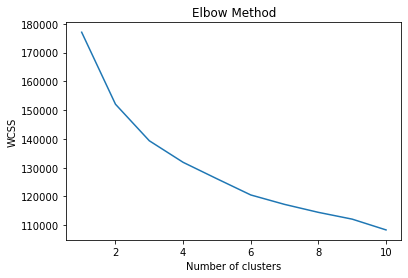

In [185]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=123)
    kmeans.fit(df4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to the graph above, there is not a specific elbow generated but several points would be 2, 3 and 6. Since more detailed customer segments would be prefered in this case, I determined 6 as cluster number. 

In [186]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=100, n_init=10, random_state=123)
pred_c = kmeans.fit_predict(df4)


In [196]:
df4 = pd.concat([df4, pd.DataFrame(pred_c, columns=["cluster"])], axis=1)

In [216]:
df4.groupby("cluster").balance.count()

cluster
0    5974
1    7783
2    6866
3    8123
4    5449
5    5805
Name: balance, dtype: int64

In [208]:
df4.groupby("cluster").mean()

,balance,duration,campaign,day_diff,default,housing,loan,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.087016,0.053315,0.024175,0.732531,0.014396,0.644125,0.127385,0.118179,0.044694,0.014563,0.059592,0.012722,0.566622,0.023435,0.065283,0.019585,0.021091,0.144794,0.024104,0.003515,0.118681,0.480248,0.401071,0.001507,0.000000,0.982591,0.015902,0.542015,0.038165,0.419819,1.789756,0.046870,0.354202,0.267827,0.162872,0.108972,0.052896,0.004520,0.001507,0.000335,0.000000
1,0.082569,0.052135,0.028433,0.641714,0.023898,0.757549,0.167930,0.036618,0.172813,0.298343,0.025440,0.014262,0.046383,0.033406,0.022485,0.161120,0.010664,0.181550,0.024155,0.009379,0.124631,0.616857,0.258512,0.000514,0.920596,0.000000,0.078890,0.000000,0.026082,0.973918,2.018373,0.056020,0.267121,0.277014,0.211487,0.130412,0.056662,0.000899,0.000385,0.000000,0.000000
2,0.082007,0.053526,0.018847,0.788845,0.012380,0.726624,0.156569,0.106612,0.194436,0.261724,0.021264,0.011360,0.037140,0.022575,0.021701,0.163123,0.034955,0.187008,0.041509,0.003204,0.120157,0.511215,0.368628,0.013545,0.945674,0.000000,0.040781,0.959365,0.040635,0.000000,1.694873,0.072386,0.360181,0.263181,0.169240,0.088844,0.041509,0.002767,0.001456,0.000146,0.000291
3,0.084516,0.051176,0.038064,0.354599,0.028192,0.440601,0.241659,0.062415,0.149452,0.195987,0.032993,0.027084,0.058722,0.038656,0.034347,0.134433,0.003570,0.288071,0.028807,0.007879,0.123723,0.657639,0.218638,0.050351,0.902992,0.000000,0.046658,0.902992,0.092330,0.004678,3.276130,0.026714,0.262588,0.231195,0.240552,0.165702,0.073249,0.000000,0.000000,0.000000,0.000000
4,0.088747,0.049872,0.040736,0.348076,0.021105,0.388145,0.170674,0.062397,0.026243,0.007157,0.053771,0.013397,0.639567,0.016700,0.057258,0.009727,0.005322,0.153606,0.015416,0.001835,0.117086,0.597174,0.285741,0.011195,0.000000,0.979079,0.009727,0.926225,0.057809,0.015966,3.262984,0.012112,0.335658,0.255827,0.192696,0.142595,0.061112,0.000000,0.000000,0.000000,0.000000
5,0.082561,0.050521,0.032391,0.623629,0.018605,0.620844,0.154005,0.056158,0.030835,0.610853,0.024806,0.091128,0.034970,0.082171,0.018777,0.047201,0.002929,0.019466,0.029113,0.007752,0.099569,0.794143,0.106288,0.980879,0.000000,0.000172,0.018949,0.466322,0.094057,0.439621,2.207924,0.019983,0.143325,0.223600,0.274074,0.204134,0.123859,0.005168,0.003445,0.002239,0.000172


From the generated results above, cluster 3 and 4 has lowest housing and loan ownership in average and also relatively higher balance amounts among others, which may concluded as a result to say that customers belong to cluster 3 and 4 may be more likely to invest compare to others. 

In [218]:
df4[(df4.cluster==3) | (df4.cluster==4)].head()

,balance,duration,campaign,day_diff,default,housing,loan,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,quarter,age_chunk_0,age_chunk_1,age_chunk_2,age_chunk_3,age_chunk_4,age_chunk_5,age_chunk_6,age_chunk_7,age_chunk_8,age_chunk_9,cluster
12446,0.072894,0.032085,0.016129,0.534954,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
12449,0.077370,0.060388,0.016129,0.534954,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
12463,0.070062,0.016225,0.000000,0.534954,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
12465,0.071986,0.035135,0.000000,0.534954,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
12474,0.073248,0.072954,0.000000,0.534954,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
